In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# n1

In [2]:
WHITE = np.array([255, 255, 255], dtype=np.uint8)
BLACK = np.array([0, 0, 0], dtype=np.uint8)

path_maze = './mazes/2020.png'

In [3]:
image_maze = cv.imread(path_maze)

In [4]:
class MazeGraph:
    
    def __init__(self, image_maze):
        
        self.__initialize_data(image_maze)
        self.__find_route()
        
    def __initialize_data(self, image_maze):
        
        self.image = image_maze
        
        enter_start, enter_end = self.__identify_gap_h(0)
        exit_start, exit_end = self.__identify_gap_h(self.image.shape[0] - 1)
        wall_start, wall_end = self.__identify_gap_v(enter_start)

        self.cell_width = enter_end - enter_start
        wall_width = wall_end - wall_start
        
        self.step = self.cell_width + wall_width

        shape = (self.image.shape[0] // self.step, 
                 self.image.shape[1] // self.step)

        self.cells_visited = np.zeros(shape=shape, dtype=np.uint32)

        self.start = np.array([wall_width, enter_start], dtype=np.uint32)
        self.stop = np.array([self.image.shape[0] - self.step, exit_start],
                             dtype=np.uint32)
        
        self.queue = []
        self.route = []

    def __get_adj(self, i, j):
        
        adj = []
        
        if np.all(self.image[i + self.cell_width, j] == WHITE) and i + self.step < self.image.shape[0]:
            adj.append(np.array([i + self.step, j], dtype=np.uint32))
            
        if np.all(self.image[i, j + self.cell_width] == WHITE) and j + self.step < self.image.shape[1]:
            adj.append(np.array([i, j + self.step], dtype=np.uint32))
            
        if np.all(self.image[i - 1, j] == WHITE) and i - self.step > 0:
            adj.append(np.array([i - self.step, j], dtype=np.uint32))
            
        if np.all(self.image[i, j - 1] == WHITE) and j - self.step > 0:
            adj.append(np.array([i, j - self.step], dtype=np.uint32))
            
        return adj
    
    def __forward_pass(self):
        
        i, j = self.start // self.step
        self.cells_visited[i, j] = 1
        
        cell_curr = None
        is_exit_found = False
        
        self.queue.append(self.start)
        
        while len(self.queue) and not is_exit_found:
            
            cell_curr = self.queue.pop(0)
            adjs = self.__get_adj(cell_curr[0], cell_curr[1])
            
            for adj in adjs:
                
                i_curr, j_curr = cell_curr // self.step 
                i, j = adj // self.step
                
                if self.cells_visited[i, j] == 0:
                
                    self.cells_visited[i, j] = self.cells_visited[i_curr, j_curr] + 1

                    if np.all(adj == self.stop):

                        is_exit_found = True
                        break

                    self.queue.append(adj)
        
    def __backward_pass(self):
        
        i, j = self.stop // self.step
        
        dist_curr = self.cells_visited[i, j]
        cell_curr = self.stop
        
        self.route.append(self.stop)
        
        while dist_curr != 1:
            
            adjs = self.__get_adj(cell_curr[0], cell_curr[1])
            
            for adj in adjs:
                
                i, j = adj // self.step
                
                if self.cells_visited[i, j] == dist_curr - 1:
                    
                    cell_curr = adj
                    dist_curr -= 1
                    
                    break

            self.route.append(cell_curr)
                
    def __identify_gap_h(self, row):
        
        color_prev = self.image[row, 0]
        gap_start, gap_end = None, None

        for i in range(1, self.image.shape[1]):

            if np.all(self.image[row, i] != color_prev):
                color_prev = self.image[row, i]
                gap_start = i
                break

        for i in range(gap_start, self.image.shape[1]):

            if np.all(self.image[row, i] != color_prev):
                gap_end = i
                break

        return gap_start, gap_end
    
    def __identify_gap_v(self, column):
        
        color_prev = self.image[0, column]
        gap_start, gap_end = None, None

        for i in range(1, self.image.shape[0]):

            if np.all(self.image[i, column] != color_prev):
                color_prev = self.image[i, column]
                gap_start = i
                break

        for i in range(gap_start, self.image.shape[0]):

            if np.all(self.image[i, column] != color_prev):
                gap_end = i
                break

        return gap_start, gap_end
    
    def __find_route(self):
        
        if len(self.route) != 0:
            return self.route
        
        self.__forward_pass()
        self.__backward_pass()
        
        self.route.reverse()
        
        route = np.array(self.route)
        route += self.cell_width // 2
        
        exit = np.array([self.image.shape[0], route[-1, 1]], dtype=np.uint32)
        enter = np.array([0, route[0, 1]], dtype=np.uint32)
        
        self.route = np.vstack((enter, route, exit))
    
    def reset_image(self, image_maze):
        
        self.__initialize_data()
        self.__find_route()

In [5]:
%%time

mg = MazeGraph(image_maze)

CPU times: total: 31.2 ms
Wall time: 31.5 ms


In [6]:
arr = mg.route

In [8]:
completed_route = completed_route[1:, :]

In [9]:
from task_1 import find_way_from_maze

In [10]:
route = find_way_from_maze(image_maze)


plt.figure(figsize=(9, 9))
plt.imshow(image_maze)
plt.axis('off')
plt.plot(route[:, 1], route[:, 0], c='r');

[[  0 153]
 [  9 153]
 [  9 137]
 [ 25 137]
 [ 25 121]
 [  9 121]
 [  9 105]
 [  9  89]
 [  9  73]
 [ 25  73]
 [ 25  57]
 [ 25  41]
 [ 41  41]
 [ 41  57]
 [ 41  73]
 [ 57  73]
 [ 57  57]
 [ 57  41]
 [ 73  41]
 [ 89  41]
 [ 89  25]
 [105  25]
 [105   9]
 [121   9]
 [137   9]
 [153   9]
 [169   9]
 [169  25]
 [169  41]
 [169  57]
 [185  57]
 [185  41]
 [201  41]
 [217  41]
 [217  25]
 [217   9]
 [233   9]
 [233  25]
 [233  41]
 [249  41]
 [265  41]
 [281  41]
 [281  57]
 [281  73]
 [281  89]
 [265  89]
 [265  73]
 [249  73]
 [249  89]
 [233  89]
 [217  89]
 [217  73]
 [233  73]
 [233  57]
 [217  57]
 [201  57]
 [201  73]
 [185  73]
 [185  89]
 [201  89]
 [201 105]
 [217 105]
 [233 105]
 [249 105]
 [265 105]
 [265 121]
 [249 121]
 [249 137]
 [265 137]
 [281 137]
 [297 137]
 [313 137]
 [313 153]
 [297 153]
 [297 169]
 [281 169]
 [265 169]
 [249 169]
 [249 185]
 [265 185]
 [265 201]
 [265 217]
 [281 217]
 [281 233]
 [297 233]
 [297 217]
 [297 201]
 [281 201]
 [281 185]
 [297 185]
 [313 185]

IndexError: index 1 is out of bounds for axis 0 with size 1

# n2

In [14]:
def identify_lane_borders(image):
    
    lane_start, borders = None, []
    
    for i in range(image.shape[1]):
        
        if image[0, i] != 255 and lane_start is None:
            lane_start = i
            
        if image[0, i] != 0 and lane_start is not None:
            
            border = np.array([lane_start, i - 1], dtype=np.uint32)
            borders.append(border)
            
            lane_start = None
            
    return np.array(borders)

In [19]:
def find_road_number(image):
    
    image_gray = cv.cvtColor(image, code=cv.COLOR_RGB2GRAY)
    
    lanes_low, lanes_high = 230, 255
    lanes = cv.inRange(image_gray, lanes_low, lanes_high)
    
    car_low, car_high = np.array([40, 100, 250]), np.array([60, 121, 255])
    car = cv.inRange(image, car_low, car_high)
    
    barriers_low, barriers_high = np.array([250, 30, 0]), np.array([255, 50, 10])
    barriers = cv.inRange(image, barriers_low, barriers_high)
    
    borders_lane = identify_lane_borders(lanes)
    borders_car = np.where(car == 255)[1]
    borders_barriers = np.where(barriers == 255)[1]
    
    lane_car, lane_free = None, None
    
    for i, border in enumerate(borders_lane):
    
        left, right = border

        ind_car = np.where((borders_car > left) & (borders_car < right))[0]
        ind_free = np.where((borders_barriers > left) & (borders_barriers < right))[0]
    
        if len(ind_free) == 0:
            lane_free = i

        if len(ind_car) > 0:
            line_car = i
            
    return lane_free if lane_free != lane_car else 'перестраиваться не нужно'

In [16]:
path_road = './task_2/image_02.jpg'

In [18]:
image = cv.imread(path_road)
image_rgb = cv.cvtColor(image, code=cv.COLOR_BGR2RGB)

find_road_number(image_rgb)

[697 698 699 ... 506 507 508]


0

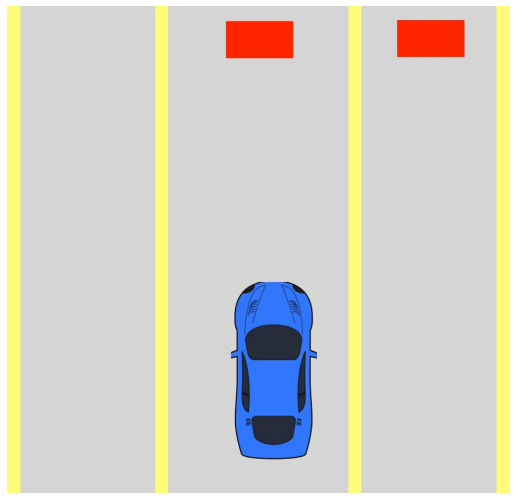

In [12]:
plt.figure(figsize=(9, 9))
plt.imshow(image_rgb)
plt.axis('off');

# n3

In [13]:
path_image = './task_3/lk.jpg'

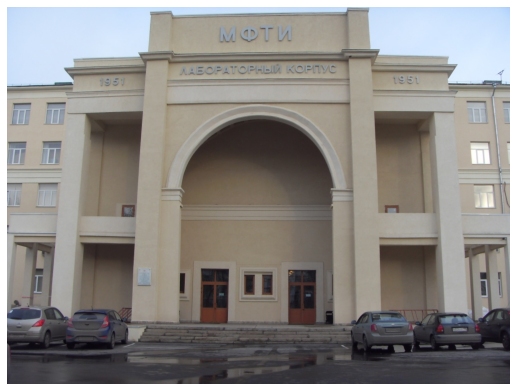

In [14]:
image = cv.imread(path_image)
image = cv.cvtColor(image, code=cv.COLOR_BGR2RGB)

plt.figure(figsize=(9, 9))
plt.imshow(image)
plt.axis('off');

In [18]:
def rotate(image, point, angle):
    
    rotated = image.copy()
    
    while angle >= 90:
        
        rotated = cv.rotate(rotated, cv.ROTATE_90_COUNTERCLOCKWISE)
        angle -= 90
    
    a_sin = int(np.ceil(np.sin(np.deg2rad(angle)) * rotated.shape[1]))
    b_sin = int(np.ceil(np.sin(np.deg2rad(angle)) * rotated.shape[0]))
    
    a_cos = int(np.ceil(np.cos(np.deg2rad(angle)) * rotated.shape[1]))
    b_cos = int(np.ceil(np.cos(np.deg2rad(angle)) * rotated.shape[0]))

    new_shape = (a_cos + b_sin, a_sin + b_cos)

    padding_v = np.zeros((a_sin, rotated.shape[1], 3), dtype=rotated.dtype)
    padding_h = np.zeros((a_sin + rotated.shape[0], b_cos, 3),
                         dtype=rotated.dtype)

    padded = np.hstack((np.vstack((padding_v, rotated)), padding_h))
    
    matrix1 = cv.getRotationMatrix2D((0, a_sin), angle, scale=1)
    rotated = cv.warpAffine(padded, matrix1, new_shape)
    
    return rotated

In [84]:
def rotate2(image, point, angle):
    
    verticies = np.array([[image.shape[1] - 1, image.shape[0] - 1],
                          [0, 0], [image.shape[1] - 1, 0], 
                          [0, image.shape[0] - 1]])
    
    M = cv.getRotationMatrix2D(point, angle, scale=1.0)
    
    verticies_r3 = np.hstack((verticies, np.ones((verticies.shape[0], 1))))
    verticies_transformed = M @ verticies_r3.T
    
    M[:, 2] -= verticies_transformed.min(axis=1)
    new_shape = verticies_transformed.max(axis=1) - verticies_transformed.min(axis=1)
    new_shape = np.int64(np.ceil(new_shape))
    
    return cv.warpAffine(image, M, new_shape)

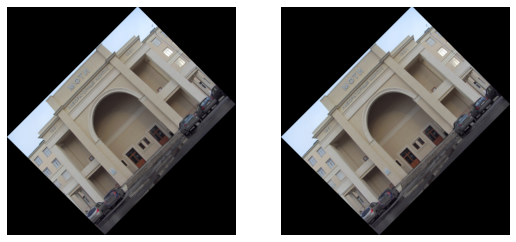

In [89]:
rotated1 = rotate(image, (0, 0), 45)
rotated2 = rotate2(image, (0, 0), 45)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 18))

ax1.imshow(rotated1)
ax2.imshow(rotated2)
ax1.axis('off')
ax2.axis('off');

In [77]:
def apply_warpAffine(image, points1, points2):
    
    verticies = np.array([[image.shape[1] - 1, image.shape[0] - 1],
                          [0, 0], [image.shape[1] - 1, 0], 
                          [0, image.shape[0] - 1]])
    
    M = cv.getAffineTransform(point_1, point_2)
    
    verticies_r3 = np.hstack((verticies, np.ones((verticies.shape[0], 1))))
    verticies_transformed = M @ verticies_r3.T
    
    M[:, 2] -= verticies_transformed.min(axis=1)
    new_shape = verticies_transformed.max(axis=1) - verticies_transformed.min(axis=1)
    new_shape = np.int64(np.ceil(new_shape))
    
    return cv.warpAffine(image, M, new_shape)

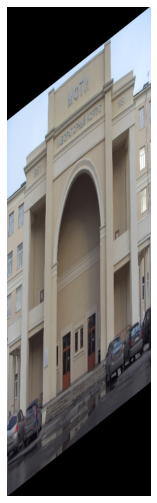

In [80]:
points_1 = np.float32([[50, 50], [400, 50], [50, 200]])
points_2 = np.float32([[100, 100], [200, 20], [100, 250]])

transformed = apply_warpAffine(image, points_1, points_2)

plt.figure(figsize=(9, 9))
plt.imshow(transformed)
plt.axis('off');

In [112]:
arr = [[1, 2, 3], [2, 3, 4], [5, 6, 7]]
col = [1, 2, 3]

print(col in arr)

True
